#Q1 Can we use Bagging for regression problems?


Yes, **Bagging** (Bootstrap Aggregating) can definitely be used for regression problems. Bagging is a general ensemble method that improves the performance of machine learning models by combining the predictions of multiple models to reduce variance and overfitting.

In regression, Bagging works as follows:

1. **Bootstrap Sampling**: Generate multiple random samples of the training data by sampling with replacement (i.e., creating bootstrapped datasets).

2. **Model Training**: Train a separate regression model (such as a decision tree, linear regression, etc.) on each of the bootstrapped datasets.

3. **Prediction**: When making predictions, each model in the ensemble will output a prediction. For regression, the final prediction is typically the **average** (or mean) of all the individual model predictions.

### Advantages of Bagging in Regression:
- **Reduced Variance**: By combining multiple models, Bagging reduces the variance, making the final model more robust and less sensitive to noise in the data.
- **Improved Accuracy**: It tends to improve the performance of models, particularly in cases where the base model has high variance (e.g., decision trees).
- **Handling Overfitting**: In many cases, Bagging can help reduce the likelihood of overfitting, especially with complex models like decision trees.

A popular example of Bagging applied to regression is **Random Forests**. Random Forest is an ensemble method that uses decision trees as base learners and employs Bagging to combine them for regression tasks.




#Q2 What is the difference between multiple model training and single model training?


The difference between **multiple model training** and **single model training** primarily lies in how many models are trained and how their predictions are combined to make final predictions.

### 1. **Single Model Training**
In **single model training**, one model is trained on the entire training dataset, and it is then used to make predictions on new data. The process looks like this:

- **Training**: You train a single model (e.g., linear regression, decision tree, etc.) on the entire dataset.
- **Prediction**: The trained model is used to make predictions for new, unseen data.
  
**Characteristics**:
- **Simplicity**: It’s straightforward, typically quicker, and easy to interpret.

- **Bias-Variance Tradeoff**: A single model might suffer from high bias or high variance depending on the algorithm used. For example, linear regression might have high bias but low variance, while a deep decision tree could have low bias but high variance.
- **Risk of Overfitting or Underfitting**: A single model is more susceptible to overfitting or underfitting, especially if it’s not complex enough to capture the underlying patterns (underfitting) or too complex and sensitive to noise in the data (overfitting).

### 2. **Multiple Model Training (Ensemble Learning)**
In **multiple model training**, multiple models are trained independently, and their predictions are combined to form the final output. This is commonly seen in **ensemble methods** like Bagging, Boosting, and Stacking. The process typically looks like this:

- **Training**: Multiple models are trained, often on different subsets of the data (as in Bagging) or with different weights (as in Boosting). For example, in Random Forest (a Bagging method), many decision trees are trained on bootstrapped datasets.
- **Prediction**: The predictions of the individual models are combined in some way (e.g., averaging for regression, voting for classification).

**Characteristics**:
- **Improved Performance**: By combining multiple models, ensemble methods often lead to better performance than a single model. This is because they can reduce bias (e.g., Boosting) or variance (e.g., Bagging) or both, depending on the method.

- **Reduced Overfitting/Underfitting**: Ensemble methods can mitigate the overfitting problem of complex models or underfitting of simple models by combining multiple weak learners to form a stronger model.
- **Complexity**: Training multiple models takes more time and computational resources. Also, interpreting an ensemble of models can be more challenging than interpreting a single model.
- **Diversity**: The power of ensemble methods lies in the diversity of models. Combining different types of models or using variations of the same model can improve robustness.

### Key Differences:
| **Aspect**               | **Single Model Training**                        | **Multiple Model Training**                        |
|--------------------------|--------------------------------------------------|---------------------------------------------------|
| **Number of Models**      | One model                                        | Multiple models                                   |
| **Training Process**      | One model trained on the entire dataset         | Multiple models trained, often on different subsets of the data |
| **Prediction Process**    | Single model used for prediction                | Predictions are combined from multiple models     |
| **Bias and Variance**     | Tradeoff between bias and variance              | Can reduce both bias and variance depending on the ensemble method (e.g., Bagging reduces variance, Boosting reduces bias) |
| **Complexity**            | Simpler and faster to train                     | More complex, requires more time and resources    |
| **Interpretability**      | Easier to interpret                             | Harder to interpret, especially for complex ensembles like Random Forest or XGBoost |

### Examples:
- **Single Model**: Training a single decision tree to predict house prices based on features like square footage and number of bedrooms.
- **Multiple Models**: Training multiple decision trees in a Random Forest or boosting a set of weak learners in a Gradient Boosting Machine (GBM) to predict house prices.



#Q3 Explain the concept of feature randomness in Random Forest.

Feature randomness is a key concept in **Random Forest** models, which are a type of ensemble learning technique based on decision trees. Random Forests improve the performance of decision trees by creating many trees, each trained on a different subset of data, and introducing randomness to reduce overfitting and improve generalization.

Here’s how feature randomness works in a Random Forest:

### 1. **Random Selection of Features at Each Split**:
   In a traditional decision tree, for each node split, the algorithm evaluates all possible features and chooses the best one based on a criterion (e.g., Gini impurity, entropy). However, in a Random Forest, **feature randomness** means that at each node, only a **random subset of features** is considered for splitting the node, rather than using all available features.

   This approach helps:
   - **Prevent overfitting**: Since different trees are built using different subsets of features, the trees become less correlated with each other, which helps in reducing the model's variance and overfitting.
   - **Increase diversity**: By using random subsets of features, Random Forest ensures that the individual trees are diverse, which leads to better overall performance when predictions from all trees are combined.

### 2. **How Randomness is Controlled**:
   - When training each tree in the forest, the algorithm selects a random subset of features (instead of using all features).
   - The number of features selected for each split is typically controlled by a parameter, often referred to as **`max_features`**.
     - For classification, it could be the square root of the total number of features (`sqrt(p)`).
     - For regression, it could be the total number of features divided by three (`p/3`).

### 3. **Impact on the Random Forest**:
   - **Reduces correlation among trees**: Since each tree is trained using different subsets of features, they will likely make different decisions, which decreases the correlation between the individual trees in the forest.
   - **Improves accuracy**: The diversity of the trees means that when predictions are aggregated (usually by majority voting for classification or averaging for regression), the Random Forest model tends to outperform a single decision tree, particularly in terms of generalization to new, unseen data.

### Example:
Imagine you have 10 features in your dataset. If each decision tree in the Random Forest considers only 3 of them at each split (chosen randomly), it ensures that each tree will explore different combinations of features, reducing the likelihood of overfitting on any single set of features.

### Conclusion:
Feature randomness in Random Forests is essential for ensuring that the model performs well by reducing overfitting, improving generalization, and creating diverse trees that collectively make robust predictions. It’s one of the key aspects that differentiates Random Forest from simpler decision tree models.










#Q4 What is OOB (Out-of-Bag) Score?


The **Out-of-Bag (OOB) score** is a performance metric used in Random Forest models (and other ensemble methods like Bootstrap Aggregating or Bagging). It provides an estimate of the model's accuracy on unseen data during the training phase, without needing a separate validation or test set.

### How OOB Works:

1. **Bootstrap Sampling**:
   - In Random Forest, each tree is trained on a **bootstrap sample**—a random sample of data points taken with replacement from the original training dataset.

   - Since sampling is done with replacement, some data points may not appear in a particular tree's training set. These are referred to as **Out-of-Bag** samples for that tree. On average, about **one-third of the data points** in the original training set will be left out (not selected in a particular bootstrap sample).

2. **OOB Prediction**:
   - For each data point in the original training set, the OOB score is calculated by using the predictions from the trees that **did not use that point** in their training process.

   - Specifically, each data point is passed through all the trees where it was not part of the training subset (i.e., the "Out-of-Bag" trees). The predictions of these trees are then combined (usually by majority voting for classification or averaging for regression) to form the OOB prediction for that data point.

3. **OOB Error/Score**:
   - The OOB score or error is the overall performance metric calculated by comparing the OOB predictions to the true labels of the data points. For classification, this would be the classification accuracy, and for regression, it would be the mean squared error (MSE) or other relevant metrics.

### Advantages of OOB:

- **No Need for a Separate Validation Set**: One of the main advantages of OOB is that it provides an unbiased estimate of the model’s performance without the need for a separate validation or test set. This is particularly useful when you have limited data.
  
- **Efficient**: OOB error is computed during the training process, making it a cost-effective way to evaluate the model as it doesn't require an additional cross-validation or hold-out dataset.

- **Consistent Estimate of Model Performance**: The OOB score can give a fairly accurate estimate of how the Random Forest will perform on unseen data.

### Formula for OOB Error (for classification):
For each data point $i$, the OOB prediction is made based on the subset of trees that did not use data point $i$ in their training. The **OOB error rate** is computed as:

$$
\text{OOB Error} = \frac{1}{N} \sum_{i=1}^{N} \mathbb{I}(\hat{y}_i \neq y_i)
$$

Where:
- $N$ is the total number of data points.
- $y_i$ is the true label for data point $i$.
- $\hat{y}_i$ is the OOB prediction for data point $i$.
- $\mathbb{I}$ is an indicator function that equals 1 if the prediction is incorrect and 0 if the prediction is correct.

### Example:
Let’s say you have a dataset with 100 data points. For each tree in the Random Forest, about 67\% of the data is used for training, and 33\% is left out as OOB samples. After training the trees, you can evaluate each data point’s prediction using the trees where that data point was not used in training. The OOB score will give you an estimate of how well the model is likely to perform on unseen data based on this process.

### Conclusion:
The OOB score provides a quick and effective way to evaluate the performance of a Random Forest model during training. It uses the unused (out-of-bag) samples for each tree to make predictions, thereby offering a kind of internal cross-validation without the need for additional datasets.












#Q5 How can you measure the importance of features in a Random Forest model?


In a Random Forest model, feature importance can be measured using several techniques, with the most common being:

### 1. **Gini Impurity (or Entropy) Reduction:**
   - Each decision tree in the Random Forest builds based on splitting data using features. The most important feature is the one that, when used for a split, reduces the impurity (measured by Gini Impurity or Entropy) the most. The more a feature contributes to reducing impurity across all trees, the more important it is.

   - **Gini Impurity** measures how often a randomly chosen element would be incorrectly classified. If a feature consistently leads to high reduction in Gini across trees, it is considered important.

### 2. **Mean Decrease in Accuracy (Permutation Importance):**
   - This method evaluates the importance of a feature by randomly shuffling its values and measuring the decrease in the model's accuracy. If shuffling a feature significantly reduces the model's accuracy, it indicates that the feature is important for making predictions.

   - This method can be applied after the model is trained and gives an indication of how much each feature contributes to the overall performance.

### 3. **Mean Decrease in Impurity (MDI):**
   - This is the most common feature importance measure provided by the `RandomForestClassifier` or `RandomForestRegressor` in many libraries like `scikit-learn`.

   - It calculates the total reduction of the impurity criterion (such as Gini or MSE) brought by each feature. This is done by summing the impurity decrease from all the nodes where the feature is used to split the data, normalized by the number of samples in each node.
   - Features contributing the most to impurity reduction are considered more important.

### 4. **TreeSHAP (SHapley Additive exPlanations):**
   - SHAP values provide a game-theory-based approach to assigning each feature a value based on its contribution to the final prediction.

   - It is a more interpretable and consistent method, providing the exact contribution of each feature in a model’s prediction, and can be applied to Random Forests as well.

### Example using `scikit-learn`:

In Python, using `scikit-learn`, the importance of features in a Random Forest can be easily accessed via the `feature_importances_` attribute. Here is an example:

                
                from sklearn.ensemble import RandomForestClassifier
                from sklearn.datasets import load_iris
                import pandas as pd
                
                # Load dataset
                data = load_iris()
                X, y = data.data, data.target
                
                # Train a Random Forest model
                rf = RandomForestClassifier(n_estimators=100)
                rf.fit(X, y)
                
                # Get feature importances
                importances = rf.feature_importances_
                
                # Create a DataFrame for easy visualization
                feature_names = data.feature_names
                importance_df = pd.DataFrame({
                    'Feature': feature_names,
                    'Importance': importances
                }).sort_values(by='Importance', ascending=False)
                
                print(importance_df)


This code will output a list of features along with their importance scores. The higher the importance score, the more significant the feature is in making predictions.












#Q6 Explain the working principle of a Bagging Classifier.


A **Bagging Classifier** (short for **Bootstrap Aggregating**) is an ensemble learning method that improves the accuracy and stability of machine learning algorithms. The main idea behind bagging is to reduce variance and prevent overfitting by combining the predictions of multiple models. Here's how it works:

### Key Concepts:
1. **Bootstrapping**:
   - Bagging uses bootstrapping, which involves generating multiple subsets of the training data by **sampling with replacement**. This means that each subset can have some repeated data points, and some points from the original dataset might be left out.
   
2. **Training Multiple Models**:
   - A separate model (typically of the same type) is trained on each of these bootstrapped datasets. This results in multiple versions of the model, each having seen slightly different data.

3. **Prediction Aggregation**:
   - Once all the models are trained, the predictions are made by each individual model.
   - For classification problems, the final prediction is typically obtained by **majority voting**, where the class predicted by most models is selected as the final prediction.
   - For regression problems, the final prediction is usually the **average** of all the individual model predictions.

### Steps in Bagging:
1. **Data Bootstrapping**:
   - Given a dataset with \( N \) examples, create \( M \) different subsets of the data, each with \( N \) examples (sampling with replacement).
   
2. **Train Models**:
   - Train a separate model on each of the \( M \) subsets. These models are independent of each other and may have different strengths and weaknesses depending on the data they were trained on.
   
3. **Make Predictions**:
   - Each model makes a prediction on the test data.
   
4. **Aggregate Predictions**:
   - For classification, the final output is determined by the majority vote of all models.
   - For regression, the final output is the average of all model outputs.

### Why Bagging Works:
- **Reduces Variance**: By training multiple models on different subsets of data, bagging helps in reducing the variance of the predictions, especially for high-variance models like decision trees.

- **Prevents Overfitting**: Since it combines predictions from multiple models, bagging tends to smooth out predictions and avoid the overfitting issue that could arise if a single model is overfitted to noise in the data.

### Example of a Bagging Classifier:
A commonly used model in bagging is the **Random Forest**. A Random Forest is essentially a bagging classifier where each individual model is a decision tree.
















#Q7 How do you evaluate a Bagging Classifier’s performance?




Evaluating the performance of a **Bagging Classifier** is similar to evaluating other machine learning models. You typically assess how well the model generalizes to unseen data, using several metrics and techniques. Here’s how you can evaluate the performance of a Bagging Classifier:

### 1. **Split the Data into Training and Test Sets**:
   - **Training Set**: The model will be trained on this subset of the data.
   - **Test Set**: This subset will be used to evaluate how well the model generalizes to unseen data.

   You can use techniques like **k-fold cross-validation** or a simple **train-test split** to divide the data. Cross-validation is often preferred because it provides a more reliable performance estimate by testing the model multiple times on different data subsets.

### 2. **Use Performance Metrics**:
Depending on the type of problem (classification or regression), you would use different performance metrics:

#### For **Classification**:
- **Accuracy**: The proportion of correctly predicted instances out of all instances.
  $$
  \text{Accuracy} = \frac{\text{Correct Predictions}}{\text{Total Predictions}}
  $$

- **Precision**: The proportion of positive predictions that are actually correct.
  $$
  \text{Precision} = \frac{TP}{TP + FP}
  $$
  where $TP$ = True Positives, and $FP$ = False Positives.

- **Recall (Sensitivity)**: The proportion of actual positives that were correctly identified.
  $$
  \text{Recall} = \frac{TP}{TP + FN}
  $$
  where $FN$ = False Negatives.

- **F1 Score**: The harmonic mean of Precision and Recall, used when you need a balance between the two metrics.
  $$
  \text{F1 Score} = \frac{2 \times \text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
  $$

- **ROC-AUC**: The area under the **Receiver Operating Characteristic curve**, which plots True Positive Rate (Recall) vs. False Positive Rate. A higher AUC indicates better model performance.

- **Confusion Matrix**: A matrix that shows the true positives, false positives, true negatives, and false negatives. This helps you better understand how your model is performing on each class.

#### For **Regression**:
- **Mean Absolute Error (MAE)**: The average of the absolute differences between predicted and actual values.
  $$
  \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
  $$
  where $y_i$ is the actual value and $\hat{y}_i$ is the predicted value.

- **Mean Squared Error (MSE)**: The average of the squared differences between predicted and actual values.
  $$
  \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
  $$

- **Root Mean Squared Error (RMSE)**: The square root of MSE, which brings the error back to the original units of the target variable.
  $$
  \text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
  $$

- **R-squared (R²)**: The proportion of variance in the dependent variable that is predictable from the independent variables. A higher R² indicates a better fit.

### 3. **Cross-Validation**:
   - **k-fold Cross-Validation**: This involves splitting the dataset into $k$ subsets, training the model $k$ times, each time using $k-1$ subsets for training and the remaining one for testing. The results are averaged to get a more robust estimate of model performance. It’s particularly useful for preventing overfitting and obtaining a more generalizable performance metric.

   - **Stratified k-fold Cross-Validation**: For classification tasks, especially with imbalanced classes, stratified cross-validation ensures each fold has a proportional distribution of the target classes.

### 4. **Out-of-Bag (OOB) Error Estimation** (Specific to Bagging):
   - **Out-of-Bag (OOB) Error** is a unique feature of Bagging classifiers. In each bootstrap sample, about one-third of the training data is not used (since bootstrapping involves sampling with replacement). These unused data points are referred to as the **out-of-bag** instances for each model.

   - After training the bagging classifier, the model’s performance can be evaluated on these out-of-bag instances to estimate error without needing a separate validation set.
   - The **OOB error rate** is calculated by averaging the error on the OOB instances for each model across all models.

### 5. **Visualize Model Performance**:
   - **Learning Curves**: You can plot learning curves that show how the model's performance changes as more training data is added. This helps to understand whether the model benefits from more data or if it’s overfitting.
   
   - **Feature Importance**: For certain models like **Random Forests**, you can also evaluate which features are the most important for making predictions, which can provide insights into the model's decision-making process.

### 6. **Compare with Baseline Model**:
   It’s often useful to compare the performance of your Bagging Classifier to a baseline model, such as a **single decision tree**, to see if the ensemble approach improves performance. If bagging doesn’t significantly outperform the baseline, it might indicate that bagging is not needed for that particular problem.

### 7. **Hyperparameter Tuning**:
   After evaluating the performance, you can fine-tune hyperparameters (e.g., number of models, max depth of individual trees, etc.) to optimize the Bagging Classifier’s performance. Grid search or random search methods can be used to explore different hyperparameter configurations.














#Q8 How does a Bagging Regressor work?


A **Bagging Regressor** is an ensemble learning method that combines the predictions of multiple individual regression models to improve the overall performance of the model. The main idea is similar to the Bagging Classifier, but instead of classifying instances into categories, the Bagging Regressor predicts continuous values. Here's how a **Bagging Regressor** works in detail:

### Key Steps in the Bagging Regressor:

1. **Data Bootstrapping**:
   - **Bootstrapping** involves creating multiple subsets of the original dataset by **sampling with replacement**. This means that for each subset, some instances from the original dataset might be repeated, and others may be omitted.
   - For instance, if you have a dataset with 1000 instances, you might create several subsets (say 50 subsets), each containing 1000 instances, but some of the instances might appear multiple times while others may be missing.

2. **Train Multiple Models**:
   - A separate **regressor** (e.g., decision tree, linear regression, etc.) is trained on each of these bootstrapped subsets.
   - Each regressor learns a model on different data, allowing the ensemble of regressors to capture different aspects or patterns in the data.
   - Since each model sees different data, they are likely to make different predictions, but all models should ideally capture the underlying trends in the data.

3. **Make Predictions**:
   - After training, each regressor makes its prediction on a new, unseen data point (test data).
   - Each individual model will output a **continuous prediction** for the target variable.

4. **Aggregate Predictions**:
   - **Averaging**: In the case of regression, the predictions from all individual models are **averaged** to get the final prediction. This is different from classification, where we typically use majority voting.
     \$
     \hat{y} = \frac{1}{M} \sum_{i=1}^{M} \hat{y}_i
     \$


   - By averaging the predictions, the Bagging Regressor reduces the variance of individual models, leading to a more stable and accurate overall prediction.

### Why Bagging Regressor Works:

- **Reduces Variance**:
  - By training multiple models on different subsets of data and averaging their predictions, bagging reduces the variance of the model. This is particularly useful when using high-variance models like **decision trees**, which can easily overfit on a single training set. Bagging smooths out predictions by combining the output of many models.
  
- **Improves Stability**:
  - Bagging helps make the model more stable by averaging out the noise and fluctuations in predictions that might occur with a single model.

- **Prevents Overfitting**:
  - Because bagging uses different subsets of the training data for each regressor, it can help reduce the tendency of overfitting that might occur if the model was trained on the entire dataset with a single regressor (especially in high-variance models like decision trees).

### Example of a Bagging Regressor (using Decision Trees):
In a Bagging Regressor, typically **decision trees** are used as the base learners, since decision trees have high variance and benefit significantly from bagging. Here's how a Bagging Regressor using decision trees would work:

1. **Bootstrapping**: You create multiple bootstrap samples of the training data.

2. **Training**: Train a separate decision tree on each bootstrap sample.
3. **Predictions**: Each decision tree makes a prediction for each new data point.
4. **Averaging**: Average the predictions from all the trees to get the final output.

### Example Workflow:

Let's say you are trying to predict the **price** of a house based on various features such as the number of bedrooms, square footage, etc. Using a Bagging Regressor:

- You take your training data and generate 50 bootstrap samples.

- You train 50 decision trees on each of the 50 bootstrap samples.
- Each tree makes a prediction for the house price based on the features.
- The Bagging Regressor takes the average of all 50 predictions to provide a final predicted price.

### Advantages of a Bagging Regressor:

- **Improved Accuracy**: By combining predictions from multiple models, bagging can achieve better accuracy than individual models, especially when using high-variance models like decision trees.

- **Reduced Overfitting**: Bagging can reduce overfitting since it doesn’t rely on a single model, which could otherwise overfit the data.
- **Versatility**: It can work with any type of regressor (decision trees, linear regression, etc.).

### Disadvantages of a Bagging Regressor:

- **Increased Computational Cost**: Since multiple models are being trained and predictions need to be aggregated, bagging can be computationally expensive, especially for large datasets or when the base learner is a complex model.

- **Interpretability**: The final model can become less interpretable compared to a single model, as it’s a combination of many models whose individual contributions are harder to trace.

### Real-World Example:
One of the most popular implementations of a Bagging Regressor is the **Random Forest Regressor**, where the base model is a decision tree, and it uses bagging to improve the model's performance. It’s widely used for tasks like predicting stock prices, house prices, or any continuous-valued outcomes.















#Q9 What is the main advantage of ensemble techniques?



The main advantage of **ensemble techniques** is their ability to **improve model performance** by combining the predictions of multiple individual models. This approach leverages the strengths of each model, leading to a more accurate and robust overall prediction. Here are the key reasons why ensemble methods are powerful:

### 1. **Reduction of Overfitting (for High-Variance Models)**:
   - Ensemble methods, especially techniques like **Bagging** (e.g., Random Forests), help reduce overfitting, particularly for high-variance models like decision trees. By combining multiple models, ensemble methods smooth out the noise and fluctuations that might occur in individual models, making the overall model more generalized and less prone to overfitting.

### 2. **Improved Accuracy**:
   - Combining several models typically leads to better performance than any individual model. While a single model might make errors in certain situations, the ensemble can "average out" these errors, leading to a more accurate final prediction. This can be especially true in diverse datasets where different models might perform well on different parts of the data.

### 3. **Reduction of Variance** (for Unstable Models):
   - For **high-variance** models like decision trees, small changes in the data can lead to large changes in the model’s predictions. By using ensemble methods like **Bagging**, the variance of the model’s predictions is reduced. The predictions from multiple models are averaged, which leads to a more stable and reliable outcome.

### 4. **Bias-Variance Tradeoff**:
   - Ensemble methods can improve the **bias-variance tradeoff**. While individual models may have high bias (underfitting) or high variance (overfitting), an ensemble can help balance these issues. For example, methods like **Boosting** can reduce bias by iteratively correcting errors made by earlier models, while methods like **Bagging** help reduce variance.

### 5. **Handling Diverse Data Patterns**:
   - Ensemble methods can capture a wider variety of patterns and relationships in the data because different models might focus on different aspects or features of the dataset. For example, in Random Forests (a Bagging-based method), each tree in the ensemble is trained on a different subset of the features, allowing the ensemble to capture more complex relationships than any individual tree.

### 6. **Robustness**:
   - Ensembles are more robust to noise and outliers because the final decision is based on multiple models rather than a single one. While individual models might be sensitive to noisy or outlier data points, an ensemble is less likely to be affected because errors from individual models can cancel out.

### 7. **Improved Generalization**:
   - By leveraging multiple models, ensembles are generally better at generalizing to new, unseen data. This means that they are less likely to perform well only on the training data but instead maintain strong performance on test datasets as well.

### Examples of Popular Ensemble Methods:
- **Bagging (Bootstrap Aggregating)**: Reduces variance and prevents overfitting by training multiple models (e.g., decision trees) on bootstrapped subsets of the data and averaging their predictions. Example: Random Forest.

- **Boosting**: Focuses on reducing bias by iteratively training models, where each new model corrects the errors of the previous ones. Example: AdaBoost, Gradient Boosting, XGBoost.
- **Stacking**: Combines the predictions of multiple models (of different types) by training a meta-model on their outputs, often improving performance over individual models.




















#Q10 What is the main challenge of ensemble methods?




The main challenge of ensemble methods is **overfitting**, especially when the individual models in the ensemble are too complex or if they are highly correlated with one another. While ensemble methods like **bagging** (e.g., Random Forest) and **boosting** (e.g., Gradient Boosting) are powerful because they combine multiple models to improve accuracy and robustness, they can still face the following issues:

1. **Overfitting**: If the base models in an ensemble are overly complex (e.g., deep decision trees) or if the ensemble itself is too large, it may fit the training data too well, leading to poor generalization on unseen data.

2. **Bias-Variance Trade-off**: Ensemble methods try to balance the bias and variance of individual models. In some cases, the ensemble might still struggle with bias (if the individual models are weak) or with variance (if they are too complex and overfit).

3. **Computational Complexity**: Ensemble methods require more computational resources and longer training times, especially if the base models are complex. This can become an issue in real-time or large-scale applications.

4. **Interpretability**: Ensemble methods, particularly those involving many models (like in Random Forests or Boosting), can be difficult to interpret. Understanding the decision-making process behind an ensemble can be challenging, making them less transparent compared to simpler, individual models.

5. **Correlated Models**: If the individual models are too similar or correlated, the ensemble might not improve performance significantly. The key to a successful ensemble is ensuring diversity among the models, which helps to correct individual model errors and reduce overfitting.









#Q11 Explain the key idea behind ensemble techniques.



The key idea behind **ensemble techniques** is to combine multiple **weak learners** (models that individually may perform only slightly better than random guessing) to form a **stronger model** that performs significantly better than any individual model. The main goal is to improve the accuracy, robustness, and generalization ability of the model.

### Here's how ensemble methods work:

1. **Diversity**: The idea is to use a group of diverse models, where each model makes different types of errors. By combining them, these errors can be canceled out or corrected, improving the overall performance. For example, one model might make a mistake in one area, while another might be correct in that same area but wrong somewhere else. Together, their mistakes can balance out.

2. **Aggregation**: The ensemble method combines the predictions from multiple models to make a final decision. This can be done in various ways, depending on the method:
   - **Voting**: In classification, each model casts a vote for a class, and the class with the majority vote is selected.
   - **Averaging**: In regression, the predictions of each model are averaged to get a final prediction.

3. **Error Reduction**: Ensemble methods aim to reduce **variance** (overfitting) and/or **bias** (underfitting). By combining several models, the ensemble reduces the likelihood that any one model's mistakes will dominate the prediction.

### Types of Ensemble Methods:
1. **Bagging** (Bootstrap Aggregating):
   - Involves training multiple models (usually of the same type, like decision trees) on different subsets of the data (created via bootstrapping, or random sampling with replacement). The predictions are then averaged (for regression) or voted on (for classification).
   - Example: **Random Forests** is a well-known bagging technique that trains many decision trees.

2. **Boosting**:
   - Boosting is a sequential ensemble method where each model is trained to correct the errors made by the previous model. Each subsequent model focuses more on the examples that the previous models misclassified.
   - Example: **AdaBoost**, **Gradient Boosting Machines (GBM)**, and **XGBoost** are popular boosting techniques.

3. **Stacking**:
   - Stacking combines multiple models of different types (e.g., decision trees, logistic regression, etc.) and uses a meta-model to make the final prediction. The idea is to leverage the strengths of different types of models by having a second model (meta-model) learn how to best combine their predictions.
   
### Why ensemble methods work well:
- **Reduction of Overfitting**: By combining multiple models, ensemble methods can reduce the likelihood of overfitting to the training data.
- **Improved Performance**: When the individual models have complementary strengths and weaknesses, their combination often results in a more accurate prediction.
- **Robustness**: Ensemble methods are generally more robust to outliers and noise compared to individual models because the final prediction reflects a consensus from several models, reducing the impact of outliers or noisy data.

In short, ensemble techniques harness the wisdom of multiple models, each with its strengths and weaknesses, to improve overall predictive performance.














#Q12 What is a Random Forest Classifier?


A **Random Forest Classifier** is an ensemble learning method used for classification tasks in machine learning. It works by creating a "forest" of decision trees during training and outputs the class that is the majority vote from all the individual trees.

Here's how it works:

1. **Building Multiple Decision Trees**: Instead of relying on a single decision tree, a random forest constructs many decision trees (hence, "forest"). Each tree is trained on a random subset of the data (this is called **bootstrapping** or **bagging**) and with a random selection of features at each split (this helps to ensure diversity among the trees).

2. **Voting for Predictions**: When making predictions, each tree in the forest gives a "vote" on what class it thinks the sample belongs to. The final prediction is determined by taking a majority vote across all trees. In classification, the class that receives the most votes from the trees is the predicted class for the input data.

### Key Features:
- **Randomness**: The method introduces randomness by sampling data and features, which reduces overfitting and improves generalization.
- **Ensemble Learning**: Since it combines the outputs of multiple decision trees, the random forest is more robust than individual decision trees and tends to have better predictive accuracy.

- **Flexibility**: It can be used for both classification (predicting categories) and regression (predicting continuous values).

### Benefits:
- **Improved Accuracy**: By averaging the predictions of multiple trees, random forests tend to be more accurate than a single decision tree.
- **Resistance to Overfitting**: The randomness introduced during training helps reduce the risk of overfitting, especially when the data is noisy or complex.

- **Feature Importance**: Random forests can provide insights into the importance of different features in the prediction, making it useful for feature selection.

### Limitations:
- **Complexity**: Random forests can become quite large and computationally expensive due to the need to train and store multiple trees.
- **Interpretability**: While decision trees are easy to interpret, random forests, as an ensemble of trees, are harder to interpret directly.












#Q13 What are the main types of ensemble techniques?



Ensemble techniques in machine learning combine multiple models to improve the overall performance, usually by increasing accuracy, stability, and generalization. The main types of ensemble techniques are:

### 1. **Bagging (Bootstrap Aggregating)**
   - **Idea**: Bagging involves training multiple copies of the same model on different random subsets of the data and then combining their outputs. This technique reduces variance and helps to prevent overfitting.
   - **How It Works**:
     - Create multiple training datasets by randomly sampling from the original dataset with replacement (bootstrapping).
     - Train a separate model (often decision trees) on each dataset.
     - For classification, combine the outputs of each model by voting (majority voting). For regression, combine the outputs by averaging.
   - **Example**: Random Forest is the most popular example of bagging.
   
   - **Benefits**:
     - Reduces variance and overfitting.
     - Effective with unstable models (models that tend to overfit).
   - **Limitations**:
     - Can be computationally expensive as it trains multiple models.

### 2. **Boosting**
   - **Idea**: Boosting trains multiple models sequentially, where each model tries to correct the errors made by the previous models. It adjusts the weight of misclassified data points to focus more on the difficult cases.
   - **How It Works**:
     - Train models sequentially, with each new model focusing on the errors of the previous model.
     - The final prediction is often a weighted sum of the individual model predictions.
   - **Example**: Popular boosting algorithms include **AdaBoost**, **Gradient Boosting**, **XGBoost**, **LightGBM**, and **CatBoost**.
   
   - **Benefits**:
     - Often produces highly accurate models.
     - Can significantly reduce bias and overfitting in comparison to individual models.
   - **Limitations**:
     - Can be sensitive to noisy data and outliers.
     - Requires careful tuning of hyperparameters.

### 3. **Stacking (Stacked Generalization)**
   - **Idea**: Stacking involves training multiple different models (base learners) on the same dataset and then combining their predictions using another model (meta-learner).
   - **How It Works**:
     - First, you train several base models on the data (these can be different algorithms like decision trees, logistic regression, etc.).
     - Then, you use the predictions of these models as input features to train a meta-model (often a simple model like logistic regression or a neural network).
     - The meta-model learns how to combine the predictions from the base models to make the final prediction.
   - **Example**: A common stacking configuration might use decision trees, logistic regression, and SVMs as base models and a logistic regression model as the meta-learner.
   
   - **Benefits**:
     - Can leverage the strengths of different types of models.
     - Can improve performance by combining models that perform well on different aspects of the data.
   - **Limitations**:
     - Can be complex to implement.
     - Requires careful management of the base learners and meta-learner to avoid overfitting.

### 4. **Voting**
   - **Idea**: Voting is a simpler ensemble method where multiple models are trained, and their predictions are combined using voting mechanisms (for classification) or averaging (for regression).
   - **How It Works**:
     - **Hard Voting**: Each model in the ensemble makes a prediction, and the final prediction is the class that receives the majority vote (for classification) or the average (for regression).
     - **Soft Voting**: Each model gives a probability (in classification) or a score (in regression), and the final prediction is based on the average of those probabilities or scores.
   - **Example**: A combination of models like logistic regression, decision trees, and k-nearest neighbors could be combined using voting.
   
   - **Benefits**:
     - Simple to implement.
     - Can work well if the base models have diverse strengths.
   - **Limitations**:
     - The performance improvement may not be significant if all base models are similar or weak.


































#Q14 What is ensemble learning in machine learning?



Ensemble learning in machine learning refers to the technique of combining multiple models (often called "learners") to improve the overall performance of a machine learning algorithm. The idea is that by combining different models, you can reduce the errors and improve the accuracy of predictions, because individual models may have different strengths and weaknesses. The principle behind ensemble learning is that multiple weak models working together can produce a strong model.

There are a few common types of ensemble learning methods:

### 1. **Bagging (Bootstrap Aggregating)**:
   - **How it works**: Multiple versions of a model are trained on different random subsets of the training data (with replacement), and their predictions are averaged or voted upon to make a final prediction.
   - **Example**: Random Forest is a well-known algorithm that uses bagging with decision trees.
   - **Goal**: Reduce variance and overfitting by averaging multiple models.

### 2. **Boosting**:
   - **How it works**: Models are trained sequentially, where each new model corrects the errors of the previous one. The final prediction is a weighted combination of all the models' predictions.
   - **Example**: AdaBoost, Gradient Boosting, and XGBoost are popular boosting algorithms.
   - **Goal**: Reduce bias and improve prediction accuracy by focusing on hard-to-predict cases.

### 3. **Stacking (Stacked Generalization)**:
   - **How it works**: Different models (of varying types) are trained on the same dataset, and their predictions are used as input to a final model (often called a meta-model), which makes the final prediction.
   - **Example**: Combining models like decision trees, logistic regression, and neural networks, and using another model (e.g., linear regression) to combine their predictions.

   - **Goal**: Leverage the strengths of different models by combining them in a way that maximizes overall performance.

### 4. **Voting**:
   - **How it works**: Multiple models are trained, and their predictions are aggregated by majority voting (for classification) or averaging (for regression).
   - **Example**: A simple majority voting system where, for classification, the class chosen by most models is the final output.
   - **Goal**: Simple aggregation that reduces error by relying on multiple models' predictions.

In general, ensemble methods can help improve the robustness and accuracy of machine learning models. They are particularly useful when individual models may have high variance or bias, as they can balance out these shortcomings when combined effectively.



















#Q15 When should we avoid using ensemble methods?



While ensemble methods are powerful and often lead to improved model performance, there are certain situations where it may be better to avoid using them. Here are some scenarios where ensemble methods might not be the best choice:

### 1. **When the Model Needs to Be Interpretable**
   - **Why avoid**: Ensemble models, especially those like random forests or boosting methods, often work by combining many individual models (e.g., decision trees or weak learners). This makes it difficult to understand how the model arrived at a specific prediction.

   - **When to avoid**: If interpretability and transparency are important—such as in fields like healthcare, finance, or law, where decisions need to be explainable—single, simpler models like logistic regression or decision trees might be better suited.

### 2. **When You Have a Small Dataset**
   - **Why avoid**: Ensemble methods typically require a large amount of data to effectively learn and combine multiple models. With small datasets, the individual models may overfit, and combining them may not provide significant benefits, or could even make overfitting worse.

   - **When to avoid**: If your dataset is small (e.g., under a few thousand samples), ensemble methods may not perform as well. In such cases, a simpler model may be sufficient and more robust.

### 3. **When You Have Limited Computational Resources**
   - **Why avoid**: Training multiple models simultaneously or sequentially (in the case of boosting) can be computationally expensive. Ensemble methods often require more memory, processing power, and time compared to single models.

   - **When to avoid**: If you are working in an environment where computational resources are limited (e.g., for real-time applications, edge devices, or large-scale systems), the added computational cost of ensemble methods may not justify the performance gains.

### 4. **When the Problem is Simple**
   - **Why avoid**: If the problem is relatively simple and can be solved by a single model with high accuracy, then ensemble methods might be overkill. For example, if a linear regression or a decision tree performs well enough, there may be no need to combine models.

   - **When to avoid**: If the problem has low complexity and a simple model works well, you may avoid the overhead and complexity of using ensemble methods.

### 5. **When There is Risk of Overfitting**
   - **Why avoid**: If not properly tuned, ensemble methods can overfit the data, especially if individual models are too complex. For instance, in boosting methods, the iterative nature of the algorithm can cause it to fit noise in the training data rather than generalizable patterns.

   - **When to avoid**: If your models are already prone to overfitting or you are working with noisy data, ensemble methods can sometimes exacerbate this issue. In such cases, techniques like regularization or cross-validation may help more than using an ensemble.

### 6. **When You Need a Fast Training Time**
   - **Why avoid**: Training time can significantly increase when using ensemble methods, especially with complex models. If speed is a critical factor (e.g., in real-time systems or scenarios with fast iteration requirements), the additional training time might not be acceptable.

   - **When to avoid**: If you need to quickly deploy a model or make rapid updates to your model, the time it takes to train an ensemble model might make it impractical.

### 7. **When You Have High-Dimensional Data**
   - **Why avoid**: In some cases, high-dimensional data (e.g., when you have many features or variables) may require special techniques like dimensionality reduction (e.g., PCA) or feature selection before building models. Ensemble methods may not always perform well without proper preprocessing.

   - **When to avoid**: If your data has a very high number of features (especially when you don’t have a lot of data), ensemble methods can suffer from the curse of dimensionality and might not perform as well as simpler, well-regularized models.

### 8. **When the Algorithm is Too Complex for the Task**
   - **Why avoid**: Some tasks may not benefit from complex ensemble methods. If the base learners (e.g., decision trees) are already performing well, stacking or boosting might add unnecessary complexity and overhead.

   - **When to avoid**: If your task is simple and base models already perform at an acceptable level, using ensembles might only complicate the process without offering a proportional gain in performance.






















#Q16 How does Bagging help in reducing overfitting?



Bagging, which stands for **Bootstrap Aggregating**, is a technique used in ensemble learning to reduce overfitting by combining multiple models trained on different subsets of data. Here's how it helps in reducing overfitting:

1. **Bootstrap Sampling**: In bagging, multiple subsets of the data are generated by **sampling with replacement** from the original dataset. Each subset is used to train a separate model. These subsets may have some duplicate points, and some points may be omitted entirely, which introduces variation in the training data.

2. **Variance Reduction**: Since each model is trained on a slightly different version of the dataset, their predictions will be different. When the predictions of these models are averaged (in regression) or voted on (in classification), the final prediction tends to be more stable and less sensitive to noise in any one dataset, reducing **variance**. Models that overfit to specific patterns or noise in the data will have their effects reduced when combined with other models that might overfit differently.

3. **Model Averaging**: By combining the predictions of multiple models, the final result is less likely to be overly influenced by the idiosyncrasies or noise in any individual model, thereby preventing overfitting to particular training examples. This averaging of predictions makes the overall model less complex and more generalized.

4. **Reducing the Impact of Outliers**: Since bagging trains multiple models on different random subsets of the data, the influence of outliers or noisy data points is reduced. A single model might fit too closely to an outlier, but with bagging, the outlier will only affect one subset and won't impact the final prediction as much.













#Q17 Why is Random Forest better than a single Decision Tree?



Random Forest is often considered better than a single Decision Tree for several reasons:

1. **Reduction of Overfitting**: A single Decision Tree is prone to overfitting, especially if it's allowed to grow deep without constraints. Overfitting means the tree captures noise or random fluctuations in the training data, which leads to poor performance on unseen data. Random Forest, by averaging predictions across many trees, reduces this overfitting.

2. **Ensemble Learning**: Random Forest is an ensemble method, meaning it combines the predictions of many individual models (decision trees in this case) to make a final prediction. Each tree is trained on a random subset of the data (via bootstrap sampling) and may focus on different features. This diversity leads to a more robust model compared to a single decision tree, which might not generalize well.

3. **Improved Accuracy**: The averaging (or majority voting) in Random Forest reduces the variance of the model, often resulting in better predictive accuracy compared to a single decision tree. The "wisdom of the crowd" effect, where multiple models contribute to the final decision, generally leads to a more reliable outcome.

4. **Handling of Complex Data**: Random Forest is better at handling more complex datasets with higher dimensions or noisy data. Since individual decision trees can easily be swayed by noise, the Random Forest's aggregated approach gives a more stable and accurate result, especially when dealing with intricate patterns in the data.

5. **Feature Importance**: Random Forest provides a natural way to estimate the importance of different features in predicting the target variable. This feature importance is often more reliable because it takes into account the collective decisions of many trees, rather than just one tree’s perspective.

6. **Robustness to Outliers and Missing Data**: Random Forest is generally more robust to outliers and missing data compared to a single Decision Tree. While individual trees can be sensitive to outliers, the Random Forest's aggregate decision-making process dilutes the effect of those outliers, making the model more stable.

7. **Better Generalization**: Since Random Forest uses bootstrapping (random sampling of data) and random feature selection, it creates diverse trees that generalize better to new, unseen data compared to a single Decision Tree, which might overfit the training data.





#Q18 What is the role of bootstrap sampling in Bagging?


In Bagging (Bootstrap Aggregating), **bootstrap sampling** plays a crucial role in improving the model's performance and reducing variance. Here's how it works and why it's important:

### What is Bootstrap Sampling?
Bootstrap sampling refers to the technique of **randomly sampling** with **replacement** from the original training dataset to create multiple new datasets, each of which will be used to train individual models (usually weak learners like decision trees). Since the samples are taken with replacement, some data points from the original dataset may appear multiple times in a new sample, while others may not appear at all.

### Role of Bootstrap Sampling in Bagging:

1. **Diverse Training Sets**:
   - Each model in the ensemble (e.g., a decision tree in Random Forest) is trained on a slightly different dataset created via bootstrap sampling. This randomness leads to **diversity** among the models.
   - Diversity is important because it prevents all models from making the same errors, which helps to improve the generalization power of the ensemble.

2. **Reduction of Overfitting**:
   - By using different subsets of the training data, the models are less likely to **overfit** the data as each model sees a different view of the data. This makes the overall ensemble model more **robust** to noise or overfitting compared to a single model that is trained on the entire dataset.

3. **Variance Reduction**:
   - Bagging primarily works by **reducing variance**. Since each model is trained on a different subset of data, their individual predictions are likely to be somewhat different. By averaging the predictions (in regression) or using majority voting (in classification), Bagging helps to smooth out these variations, leading to a more stable and accurate final prediction.
   - This is especially beneficial when using high-variance models like decision trees, which are prone to overfitting.

4. **Error Reduction**:
   - The aggregated output of Bagging tends to be more accurate because errors made by individual models may cancel each other out. If some models make errors on different parts of the data, the majority or average of the predictions across all models will often be correct.
   - Bootstrap sampling contributes to this error reduction because each model is trained on slightly different data, so they are less likely to all make the same mistakes.

5. **Improved Generalization**:
   - By training each model on a different subset of the data, bootstrap sampling helps the ensemble model generalize better to unseen data. The overall ensemble model has learned from various perspectives and is less likely to fit to noise or specific quirks of any single training set.

### Example in Bagging (e.g., Random Forest):
- In a Random Forest, which is a Bagging technique using decision trees, each decision tree is trained on a bootstrap sample of the training data. The predictions of all the decision trees are then averaged (for regression) or voted upon (for classification).
- Because of bootstrap sampling, some data points are used multiple times in different trees, while others may not be used at all. This creates a range of different trees that make slightly different decisions, and the final prediction benefits from the diversity of the trees' predictions.

















#Q19 What are some real-world applications of ensemble techniques?


Ensemble techniques are widely used in various real-world applications due to their ability to improve the accuracy, robustness, and generalization of machine learning models. Here are some notable examples:

### 1. **Finance**
   - **Credit Scoring:** Ensemble models, such as random forests or gradient boosting machines, are commonly used to predict the creditworthiness of individuals or businesses by combining predictions from multiple decision trees or models. This approach helps in reducing the risk of overfitting and provides more reliable decisions.

   - **Fraud Detection:** Financial institutions use ensemble methods to detect fraudulent transactions. By combining predictions from various models, ensembles can capture different patterns in the data and improve fraud detection systems.

### 2. **Healthcare**
   - **Disease Diagnosis:** Ensemble methods are often applied in medical diagnostics, such as predicting whether a patient has a particular disease based on medical images, lab results, or patient history. For instance, random forests or gradient boosting are used in cancer detection, such as breast cancer diagnosis, by analyzing patient data or medical imaging.

   - **Drug Discovery:** In drug discovery, ensemble techniques are used to predict how different chemical compounds will interact with specific biological targets. This helps in identifying potential drug candidates and optimizing treatment designs.

### 3. **Retail and E-commerce**
   - **Recommendation Systems:** In online retail and e-commerce, ensemble methods like bagging and boosting are used to enhance recommendation algorithms. By combining multiple recommendation models (e.g., collaborative filtering, content-based filtering, and deep learning models), companies can offer more accurate and personalized product recommendations.

   - **Sales Forecasting:** Ensemble techniques, such as stacking and boosting, are employed to predict future sales based on historical data, promotional activity, seasonality, and other factors. These predictions can help businesses optimize inventory management and pricing strategies.

### 4. **Natural Language Processing (NLP)**
   - **Sentiment Analysis:** Ensemble methods are used in sentiment analysis tasks, such as analyzing customer reviews or social media posts, by combining different classification models (e.g., SVMs, decision trees, and deep neural networks). This improves the accuracy and robustness of the sentiment predictions.

   - **Machine Translation:** Ensemble models are employed to improve the performance of machine translation systems. By combining multiple translation models, the system can handle a broader range of linguistic nuances and achieve better translation quality.

### 5. **Computer Vision**
   - **Object Detection and Image Classification:** In applications like facial recognition, autonomous driving, and medical imaging, ensemble methods such as bagging and boosting are used to combine the predictions of different deep learning models or decision trees. This leads to more accurate and reliable results in detecting objects, identifying faces, or classifying images.

   - **Image Segmentation:** Ensemble techniques help improve the segmentation of images in tasks like satellite imaging or medical image analysis. By aggregating predictions from multiple models, ensembles can produce more precise delineations of regions of interest (e.g., tumors in MRI scans).

### 6. **Autonomous Vehicles**
   - **Path Planning and Decision Making:** Ensemble methods are used in autonomous driving systems to combine the predictions of multiple models, such as neural networks and decision trees, to make real-time driving decisions. This ensures better safety and performance by accounting for various driving scenarios and uncertainties.

### 7. **Marketing and Advertising**
   - **Customer Segmentation:** Ensemble techniques are used to identify and segment different customer groups based on behavioral data, purchasing patterns, and demographics. This enables businesses to tailor marketing campaigns and product offerings more effectively.

   - **Ad Targeting:** By combining predictions from different models (e.g., collaborative filtering and content-based models), advertisers can more accurately target relevant customers for personalized ad campaigns.

### 8. **Telecommunications**
   - **Churn Prediction:** Telecom companies use ensemble methods to predict customer churn (i.e., when a customer is likely to leave the service). By combining the outputs of various predictive models, companies can identify at-risk customers and take proactive measures to retain them.

   - **Network Optimization:** Ensemble techniques can be used to improve network traffic prediction and optimize the allocation of resources, ensuring better service quality and efficiency in telecom networks.

### 9. **Weather Forecasting**
   - **Predicting Weather Patterns:** Ensemble methods like bagging, boosting, and stacking are frequently employed in meteorology to predict weather conditions. Combining multiple models trained on different features or approaches leads to more accurate and reliable weather forecasts, which is critical for disaster prevention and resource planning.

### 10. **Gaming and Sports Analytics**
   - **Player Performance Prediction:** In sports analytics, ensemble methods can predict a player's performance based on historical data, team dynamics, and other factors. Combining multiple models improves the accuracy of these predictions, which helps coaches and analysts make more informed decisions.

   - **Game Outcome Prediction:** Ensemble techniques can also be used in predicting the outcomes of games or sporting events, combining data such as player statistics, team performance, and historical trends to produce better forecasts.

Ensemble techniques improve the robustness and accuracy of predictions, especially when individual models may be prone to overfitting or have limited performance. By leveraging the strengths of multiple models, ensembles are useful in almost any domain where decision-making depends on complex, variable data.
























#Q20 What is the difference between Bagging and Boosting?



Bagging (Bootstrap Aggregating) and Boosting are both ensemble learning techniques, but they differ in how they build and combine multiple models. Here's a breakdown of the key differences:

### **1. Approach to Model Building**

- **Bagging:**
  - **Independence:** Bagging trains multiple models independently, using random subsets of the training data. Each model in the ensemble is trained on a different subset of the data, often created through bootstrapping (sampling with replacement).
  - **Parallel Training:** Since models are trained independently, bagging can be done in parallel.
  - **Goal:** The aim is to reduce variance and prevent overfitting, particularly for models that tend to overfit (e.g., decision trees).
  
- **Boosting:**
  - **Sequential Learning:** Boosting trains models sequentially. Each new model is trained to correct the errors (or misclassifications) made by the previous model. The focus is on improving performance iteratively.
  - **Dependence:** Models are dependent on one another, as each new model’s contribution is based on the previous one’s errors.
  - **Goal:** The goal is to reduce bias and improve the accuracy of the final model by giving more weight to difficult-to-predict examples.

### **2. Weighting of Models and Data Points**

- **Bagging:**
  - **Equal Weights:** In bagging, each model has equal weight in the final prediction (i.e., voting in classification or averaging in regression).
  - **Data Subsets:** Since each model is trained on a different random subset of the data, every example in the dataset can appear multiple times or not at all in each model's training set.
  
- **Boosting:**
  - **Adaptive Weights:** In boosting, the models are trained sequentially, and each new model gives more weight to the training examples that were misclassified by the previous models. As a result, harder-to-predict examples have more influence on the final model.
  - **Model Weighting:** Each model has a weight in the final prediction, which is typically based on its accuracy. Models that perform well are given more influence, while models that perform poorly have less influence.

### **3. Final Model Combination**

- **Bagging:**
  - **Voting/Averaging:** For classification problems, bagging combines the models' predictions through majority voting (each model gets one vote). For regression, it averages the predictions of the models.
  
- **Boosting:**
  - **Weighted Combination:** In boosting, the models' predictions are combined using weighted sums. The weight of each model's prediction is proportional to its accuracy, with better-performing models having a larger impact on the final prediction.

### **4. Handling Overfitting**

- **Bagging:**
  - **Reduces Variance:** Bagging is primarily designed to reduce variance by averaging out the errors from multiple models, which helps prevent overfitting, especially with high-variance models like decision trees.
  
- **Boosting:**
  - **Reduces Bias:** Boosting helps reduce both bias and variance, but it is more focused on reducing bias. However, boosting can be prone to overfitting if not carefully tuned because it focuses on improving accuracy on all data points, even those that are noisy.

### **5. Common Algorithms**

- **Bagging:**
  - **Random Forest:** A popular bagging algorithm, where multiple decision trees are trained on random subsets of the data and combined for final predictions.
  
- **Boosting:**
  - **AdaBoost (Adaptive Boosting):** Assigns more weight to misclassified examples and trains a new model to focus on these harder-to-predict points.
  - **Gradient Boosting Machines (GBM):** Builds models sequentially, where each model corrects the residuals (errors) from the previous one, often leading to improved performance.
  - **XGBoost/LightGBM/CatBoost:** Advanced versions of gradient boosting that provide faster training and better performance, especially on large datasets.

### **6. Performance and Computation**

- **Bagging:**
  - **Faster (Parallelizable):** Since the models are trained independently, bagging can be parallelized, making it faster in terms of computation for large datasets.
  
- **Boosting:**
  - **Slower (Sequential):** Boosting is sequential, meaning that each model depends on the previous one, making it harder to parallelize and generally slower than bagging.

### **7. Sensitivity to Noisy Data**

- **Bagging:**
  - **Less Sensitive to Noise:** Since bagging involves training multiple models on different data subsets, it is less sensitive to noise. The random subsets help average out the effects of noisy data.
  
- **Boosting:**
  - **More Sensitive to Noise:** Boosting can overfit noisy data because it gives more weight to the misclassified points, which could include noisy or outlier data points.

### **Summary of Key Differences**

| **Aspect**              | **Bagging**                         | **Boosting**                            |
|-------------------------|-------------------------------------|-----------------------------------------|
| **Training**            | Independent, parallel               | Sequential, dependent                  |
| **Focus**               | Reduce variance (overfitting)       | Reduce bias and variance               |
| **Model Weighting**     | Equal weight for all models         | Weights based on model accuracy        |
| **Combination**         | Majority voting (classification) or averaging (regression) | Weighted sum of predictions            |
| **Overfitting Risk**    | Less prone to overfitting           | Can overfit if not tuned properly      |
| **Speed**               | Faster (parallelizable)             | Slower (sequential)                    |
| **Common Algorithms**   | Random Forest                       | AdaBoost, Gradient Boosting, XGBoost   |

### When to Use Each:
- **Bagging** is generally used when you have high-variance models (like decision trees) and want to reduce overfitting, especially in cases with noisy data or small datasets.
- **Boosting** is typically preferred when you need to optimize performance and reduce bias, particularly in scenarios where accuracy is critical and the data is clean.

Both methods are powerful, and the choice between them depends on the nature of the problem and the specific requirements for model accuracy, speed, and robustness.
















In [6]:
#21 Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy.

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x, y = make_classification(n_samples=1000, n_features= 20, n_classes=2, random_state=1)

x_train,x_test , y_train,y_test  = train_test_split(x, y, test_size= 0.30, random_state=1)


from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()


#Ensembles
from sklearn.ensemble import BaggingClassifier
ensemble = BaggingClassifier(estimator= tree)

ensemble.fit(x_train, y_train)
y_pred = ensemble.predict(x_test)

print('Accuracy Score: ', accuracy_score(y_test,y_pred))

Accuracy Score:  0.82


In [12]:
#22 Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE).


from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

x, y = make_regression(n_samples=1000, n_features= 20,random_state=1)

x_train,x_test , y_train,y_test  = train_test_split(x, y, test_size= 0.20, random_state=1)


from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()


#Ensembles
from sklearn.ensemble import BaggingRegressor
ensemble = BaggingRegressor(estimator= tree)

ensemble.fit(x_train, y_train)
y_pred = ensemble.predict(x_test)

print('Mean Squared Error: ', mean_squared_error(y_test,y_pred))

Mean Squared Error:  5656.764136639647


In [16]:
#23 Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores.


from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd


data = load_breast_cancer()

df = pd.DataFrame(data.data , columns= data.feature_names)

x = df
y = data.target


x_train,x_test , y_train,y_test  = train_test_split(x, y, test_size= 0.20, random_state=1)


from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)


for feature ,important in zip(data.feature_names , clf.feature_importances_):
  print(f"{feature} : {important}")

mean radius : 0.04435311262105625
mean texture : 0.013108016628100521
mean perimeter : 0.06625984184185703
mean area : 0.031016117343269443
mean smoothness : 0.0057855345858371056
mean compactness : 0.0027650904267098567
mean concavity : 0.039517811525001306
mean concave points : 0.10919846171428416
mean symmetry : 0.004130382805295281
mean fractal dimension : 0.0028171395299024958
radius error : 0.00719570125719151
texture error : 0.0033360568305802144
perimeter error : 0.006221139531414167
area error : 0.04077923606667502
smoothness error : 0.004091980894713828
compactness error : 0.0037517803171236833
concavity error : 0.006621348317726745
concave points error : 0.0027641444093085216
symmetry error : 0.003003926909670421
fractal dimension error : 0.003235636429300826
worst radius : 0.1160108290696303
worst texture : 0.02382292488817252
worst perimeter : 0.14052539499521335
worst area : 0.11763544476822108
worst smoothness : 0.010708967497276659
worst compactness : 0.0164960197888735

In [19]:
#24 Train a Random Forest Regressor and compare its performance with a single Decision Tree.


from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

x, y = make_regression(n_samples=1000, n_features= 20,random_state=1)

x_train,x_test , y_train,y_test  = train_test_split(x, y, test_size= 0.30, random_state=1)


from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()

#Ensembles
from sklearn.ensemble import RandomForestRegressor
ensemble = RandomForestRegressor()

# Train the models
tree.fit(x_train, y_train)
ensemble.fit(x_train, y_train)


# Make predictions
y_pred_tree = tree.predict(x_test)
y_pred_ensemble = ensemble.predict(x_test)




# Calculate and print Mean Squared Error for both models
mse_tree = mean_squared_error(y_test, y_pred_tree)
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)

print(f'Mean Squared Error (Decision Tree): {mse_tree}')
print(f'Mean Squared Error (Random Forest): {mse_ensemble}')





Mean Squared Error (Decision Tree): 11947.893074596648
Mean Squared Error (Random Forest): 5174.094093314467


In [21]:
#25 Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier.


from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x, y = make_classification(n_samples=1000, n_features= 20, n_classes=2, random_state=1)

x_train,x_test , y_train,y_test  = train_test_split(x, y, test_size= 0.30, random_state=1)



#Ensembles
from sklearn.ensemble import RandomForestClassifier
ensemble = RandomForestClassifier(oob_score=True)

ensemble.fit(x_train, y_train)
y_pred = ensemble.predict(x_test)

print('Accuracy Score: ', accuracy_score(y_test,y_pred))
print('Out-of-Bag Score: ', ensemble.oob_score_)

Accuracy Score:  0.86
Out-of-Bag Score:  0.85


In [24]:
#26 Train a Bagging Classifier using SVM as a base estimator and print accuracy.

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x, y = make_classification(n_samples=1000, n_features= 20, n_classes=2, random_state=1)

x_train,x_test , y_train,y_test  = train_test_split(x, y, test_size= 0.20, random_state=1)


from sklearn.svm import SVC
svm = SVC(probability= True)


#Ensembles
from sklearn.ensemble import BaggingClassifier
ensemble = BaggingClassifier(estimator= svm, n_estimators= 10)

ensemble.fit(x_train, y_train)
y_pred = ensemble.predict(x_test)

print('Accuracy Score: ', accuracy_score(y_test,y_pred))

Accuracy Score:  0.855


In [28]:
#27 Train a Random Forest Classifier with different numbers of trees and compare accuracy.


from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x, y = make_classification(n_samples=1000, n_features= 20, n_classes=2, random_state=1)

x_train,x_test , y_train,y_test  = train_test_split(x, y, test_size= 0.30, random_state=1)


def rfc():

  l = [10,50,100,200]
 # Loop through different values of n_estimators
  for n in l:

    rf_classifier = RandomForestClassifier(n_estimators=n, random_state=1)


    rf_classifier.fit(x_train, y_train)


    y_pred = rf_classifier.predict(x_test)


    accuracy = accuracy_score(y_test, y_pred)


    print(f"Accuracy with {n} trees: {accuracy:.4f}")

# Call the function
rfc()

Accuracy with 10 trees: 0.8700
Accuracy with 50 trees: 0.8733
Accuracy with 100 trees: 0.8667
Accuracy with 200 trees: 0.8600


In [31]:
#28 Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score.

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

x, y = make_classification(n_samples=1000, n_features= 20, n_classes=2, random_state=1)

x_train,x_test , y_train,y_test  = train_test_split(x, y, test_size= 0.20, random_state=1)


from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


#Ensembles
from sklearn.ensemble import BaggingClassifier
ensemble = BaggingClassifier(estimator= model)

ensemble.fit(x_train, y_train)
y_prob = ensemble.predict_proba(x_test)[:, 1]

print('AUC score : ', roc_auc_score(y_test,y_prob))

AUC score :  0.9215151515151515


In [33]:
#29 Train a Random Forest Regressor and analyze feature importance scores.

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import pandas as pd


data = load_diabetes()

df = pd.DataFrame(data.data , columns= data.feature_names)

x = df
y = data.target


x_train, x_test , y_train, y_test  = train_test_split(x, y, test_size= 0.30, random_state=1)


from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)


for feature ,important in zip(data.feature_names , clf.feature_importances_):
  print(f"{feature} : {important}")

age : 0.06088981286296679
sex : 0.009814822147659583
bmi : 0.354779794649081
bp : 0.1164127021722711
s1 : 0.039485017579203745
s2 : 0.042363184701793316
s3 : 0.043376382397015856
s4 : 0.030937957627912425
s5 : 0.2506493148136549
s6 : 0.05129101104844132


In [35]:
#30 Train an ensemble model using both Bagging and Random Forest and compare accuracy.

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x, y = make_classification(n_samples=1000, n_features= 20, n_classes=2, random_state=1)

x_train,x_test , y_train,y_test  = train_test_split(x, y, test_size= 0.20, random_state=1)


from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()


#Ensembles
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(estimator= logistic)

#Random Forest
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier()


bagging.fit(x_train, y_train)
y_pred_bagging = bagging.predict(x_test)


random.fit(x_train, y_train)
y_pred_random = random.predict(x_test)

print('Accuracy Score for Bagging classifier : ', accuracy_score(y_test,y_pred_bagging))
print('Accuracy Score for Random Forest classifier : ', accuracy_score(y_test,y_pred_random))

Accuracy Score for Bagging classifier :  0.855
Accuracy Score for Random Forest classifier :  0.865


In [38]:
#31 Train a Random Forest Classifier and tune hyperparameters using GridSearchCV.

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x, y = make_classification(n_samples=1000, n_features= 20, n_classes=2, random_state=1)

x_train,x_test , y_train,y_test  = train_test_split(x, y, test_size= 0.20, random_state=1)


rf_classifier = RandomForestClassifier(random_state=1)


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid,
                           cv=5, n_jobs=-1)

grid_search.fit(x_train, y_train)


best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


y_pred = best_model.predict(x_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Best hyperparameters: {best_params}")
print(f"Test set accuracy with best model: {accuracy:.4f}")

Best hyperparameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Test set accuracy with best model: 0.8600


In [39]:
#32 Train a Bagging Regressor with different numbers of base estimators and compare performance.

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

# Generate regression data
X, y = make_regression(n_samples=1000, n_features=20, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Compare different n_estimators
for n in [10, 50, 100]:
    ensemble = BaggingRegressor(
        estimator=DecisionTreeRegressor(),
        n_estimators=n,
        random_state=1
    )
    ensemble.fit(X_train, y_train)
    y_pred = ensemble.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f'n_estimators={n}: MSE = {mse:.2f}')

n_estimators=10: MSE = 6236.32
n_estimators=50: MSE = 5263.18
n_estimators=100: MSE = 5097.21


In [1]:
#33 Train a Random Forest Classifier and analyze misclassified samples.


from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import pandas as pd

x, y = make_classification(n_samples=1000, n_features= 20, n_classes=2, random_state=1)

x_train,x_test , y_train,y_test  = train_test_split(x, y, test_size= 0.20, random_state=1)


#Ensembles
from sklearn.ensemble import RandomForestClassifier
ensemble = RandomForestClassifier()

ensemble.fit(x_train, y_train)
y_pred = ensemble.predict(x_test)

print('Accuracy Score: ', accuracy_score(y_test,y_pred))

# Analyze misclassifications
misclassified = np.where(y_pred != y_test)[0]
print(f'\nNumber of misclassified samples: {len(misclassified)}/{len(y_test)}')

# Create DataFrame of misclassified samples
misclassified_data = pd.DataFrame({
    'True Label': y_test[misclassified],
    'Predicted Label': y_pred[misclassified],
    'Sample Index': misclassified
})

# Add feature values for analysis
for i, feature in enumerate([f'Feature_{i}' for i in range(20)]):
    misclassified_data[feature] = x_test[misclassified, i]

print('\nFirst 5 misclassified samples:')
print(misclassified_data.head())

# Confusion matrix
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy Score:  0.865

Number of misclassified samples: 27/200

First 5 misclassified samples:
   True Label  Predicted Label  Sample Index  Feature_0  Feature_1  Feature_2  \
0           1                0             4  -0.437990   0.076926  -1.396307   
1           0                1            10  -0.342276   1.154121   1.386975   
2           1                0            16   1.017328   1.672117   0.011607   
3           0                1            33  -1.905851   0.984494  -0.798347   
4           0                1            34  -1.837461  -0.489084  -0.798515   

   Feature_3  Feature_4  Feature_5  Feature_6  ...  Feature_10  Feature_11  \
0   0.616182   1.006997  -0.102365  -0.713030  ...    0.220964    1.122136   
1   1.158333  -2.033919  -0.054525  -0.465495  ...    0.773290   -0.972431   
2  -1.256710   0.946080  -2.189007  -0.046420  ...    0.143760   -0.432529   
3   2.596047   0.528258  -1.609337   0.213818  ...    1.789976    1.473574   
4   1.651913   1.884965  -1

In [5]:
#34 Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier.

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x, y = make_classification(n_samples=1000, n_features= 20, n_classes=2, random_state=1)

x_train,x_test , y_train,y_test  = train_test_split(x, y, test_size= 0.30, random_state=1)


# Single Decision Tree
tree = DecisionTreeClassifier(random_state=1)
tree.fit(x_train, y_train)
y_pred_tree = tree.predict(x_test)

# Bagging with Decision Tree
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    random_state=1
)
bagging.fit(x_train, y_train)
y_pred_bagging = bagging.predict(x_test)

# Compare performance
print('Accuracy Score for Single Decision Tree:', accuracy_score(y_test, y_pred_tree))
print('Accuracy Score for Bagging Classifier:', accuracy_score(y_test, y_pred_bagging))

Accuracy Score for Single Decision Tree: 0.79
Accuracy Score for Bagging Classifier: 0.8


Confusion Matrix :  [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]




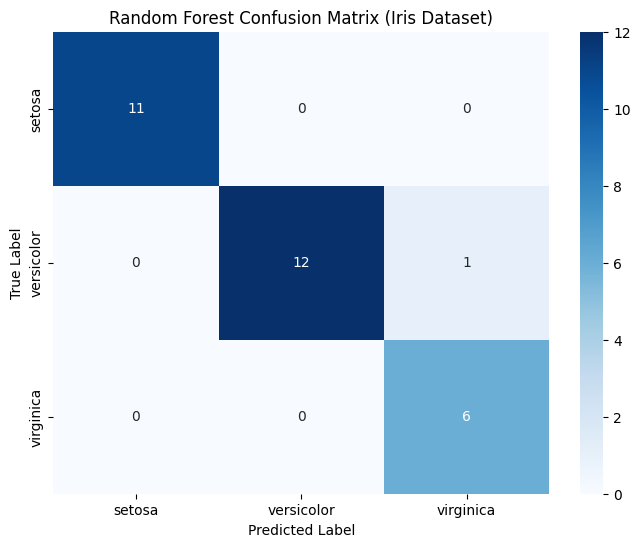

In [14]:
#35 Train a Random Forest Classifier and visualize the confusion matrix.


from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = load_iris()

df = pd.DataFrame(data.data , columns= data.feature_names)

x = df
y = data.target


x_train, x_test , y_train, y_test  = train_test_split(x, y, test_size= 0.20, random_state=1)


from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

ypred = clf.predict(x_test)

print('Confusion Matrix : ', confusion_matrix(y_test, ypred))
print('\n')

plt.figure(figsize=(8, 6))
sns.heatmap(
    confusion_matrix(y_test, ypred),
    annot=True,
    fmt="d",  # Integer formatting
    cmap="Blues",
    xticklabels=data.target_names,
    yticklabels=data.target_names,
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Random Forest Confusion Matrix (Iris Dataset)")
plt.show()

In [15]:
#36 Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy.

import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define individual models
dt = DecisionTreeClassifier(random_state=42)
svm = SVC(random_state=42)
lr = LogisticRegression(random_state=42, max_iter=200)

# Train individual models
dt.fit(X_train, y_train)
svm.fit(X_train, y_train)
lr.fit(X_train, y_train)

# Predict with individual models
dt_pred = dt.predict(X_test)
svm_pred = svm.predict(X_test)
lr_pred = lr.predict(X_test)

# Calculate accuracy for individual models
dt_accuracy = accuracy_score(y_test, dt_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
lr_accuracy = accuracy_score(y_test, lr_pred)

# Print individual model accuracies
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"SVM Accuracy: {svm_accuracy:.4f}")
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")

# Define the stacking classifier with the individual models
stacking_model = StackingClassifier(
    estimators=[('dt', dt), ('svm', svm), ('lr', lr)],
    final_estimator=LogisticRegression(random_state=42)
)


stacking_model.fit(X_train, y_train)


stacking_pred = stacking_model.predict(X_test)


stacking_accuracy = accuracy_score(y_test, stacking_pred)


print(f"Stacking Classifier Accuracy: {stacking_accuracy:.4f}")


Decision Tree Accuracy: 1.0000
SVM Accuracy: 1.0000
Logistic Regression Accuracy: 1.0000
Stacking Classifier Accuracy: 1.0000


In [26]:
#37 Train a Random Forest Classifier and print the top 5 most important features.


from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = load_wine()

df = pd.DataFrame(data.data , columns= data.feature_names)

x = df
y = data.target


x_train, x_test , y_train, y_test  = train_test_split(x, y, test_size= 0.20, random_state=1)


from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train, y_train)


# Get feature importances and sort them
feature_importances = pd.DataFrame({
    'Feature': data.feature_names,
    'Importance': clf.feature_importances_}).sort_values('Importance', ascending=False)

# Print top 5 most important features
print("Top 5 most important features:")
print(feature_importances.head(5))

Top 5 most important features:
                         Feature  Importance
6                     flavanoids    0.164277
12                       proline    0.151538
9                color_intensity    0.151336
0                        alcohol    0.140426
11  od280/od315_of_diluted_wines    0.117815


In [30]:
#38 Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score.


from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

x, y = make_classification(n_samples=1000, n_features= 20,n_classes=2 , random_state=1)

x_train,x_test , y_train,y_test  = train_test_split(x, y, test_size= 0.30, random_state=1)


from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()


#Ensembles
from sklearn.ensemble import BaggingClassifier
ensemble = BaggingClassifier(estimator= tree)

ensemble.fit(x_train, y_train)
y_pred = ensemble.predict(x_test)

print('Precision Score : ', precision_score(y_test,y_pred))
print('Recall Score : ', recall_score(y_test,y_pred))
print('F1 Score : ', f1_score(y_test,y_pred))

Precision Score :  0.8827586206896552
Recall Score :  0.7950310559006211
F1 Score :  0.8366013071895425


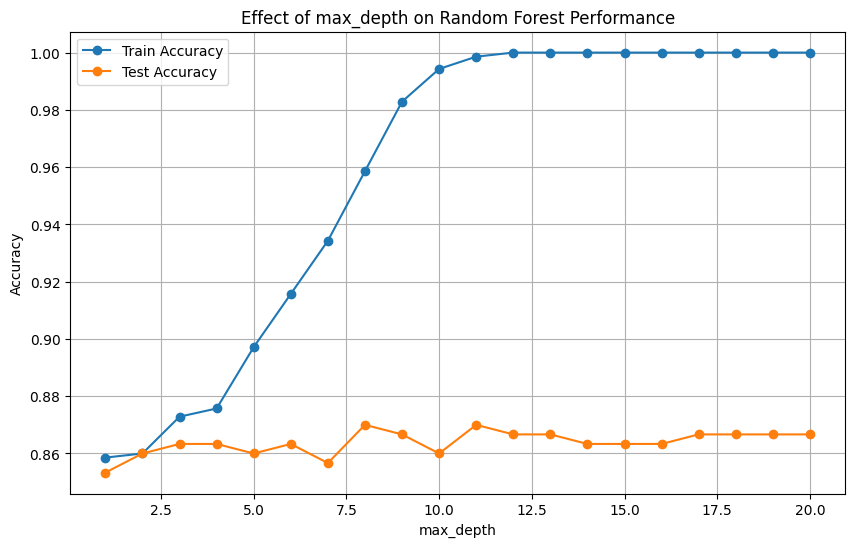

In [35]:
#39 Train a Random Forest Classifier and analyze the effect of max_depth on accuracy.


from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x, y = make_classification(n_samples=1000, n_features= 20,n_classes=2 , random_state=1)

x_train,x_test , y_train,y_test  = train_test_split(x, y, test_size= 0.30, random_state=1)



# Initialize lists to store accuracies
train_accuracies = []
test_accuracies = []

# Define a range of max_depth values to explore
max_depth_values = range(1, 21)  # Testing depths from 1 to 20

# Loop over different values of max_depth
for max_depth in max_depth_values:
    # Initialize the Random Forest classifier with the current max_depth
    ensemble = RandomForestClassifier(max_depth=max_depth, random_state=1)

    # Train the model on the training set
    ensemble.fit(x_train, y_train)

    # Predict on training and test data
    y_train_pred = ensemble.predict(x_train)
    y_test_pred = ensemble.predict(x_test)

    # Calculate accuracies
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    # Append the accuracies to the lists
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Plot the results to visualize the effect of max_depth
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(max_depth_values, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Effect of max_depth on Random Forest Performance')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
#40 Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare performance.

import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Define individual models
tree = DecisionTreeClassifier(random_state=1)
knn = KNeighborsClassifier()

# Bagging with DecisionTreeClassifier
ensemble_tree = BaggingClassifier(estimator=tree, n_estimators=50, random_state=1)
ensemble_tree.fit(X_train, y_train)
y_pred_tree = ensemble_tree.predict(X_test)

# Bagging with KNeighborsClassifier
ensemble_knn = BaggingClassifier(estimator=knn, n_estimators=50, random_state=1)
ensemble_knn.fit(X_train, y_train)
y_pred_knn = ensemble_knn.predict(X_test)

# Calculate accuracy for both models
accuracy_tree = accuracy_score(y_test, y_pred_tree)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Print the results
print(f"Bagging with DecisionTreeClassifier Accuracy: {accuracy_tree:.4f}")
print(f"Bagging with KNeighborsClassifier Accuracy: {accuracy_knn:.4f}")


Bagging with DecisionTreeClassifier Accuracy: 0.9667
Bagging with KNeighborsClassifier Accuracy: 1.0000


In [43]:
#41 Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score.

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

x, y = make_classification(n_samples=1000, n_features= 20,n_classes=2 , random_state=1)

x_train,x_test , y_train,y_test  = train_test_split(x, y, test_size= 0.30, random_state=1)



#Ensembles
from sklearn.ensemble import RandomForestClassifier
ensemble = RandomForestClassifier()

ensemble.fit(x_train, y_train)
y_prob = ensemble.predict_proba(x_test)[:, 1]

print('Roc Auc Score : ', roc_auc_score(y_test,y_prob))


Roc Auc Score :  0.9219580857053488


In [47]:
#42 Train a Bagging Classifier and evaluate its performance using cross-validation.

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.metrics import accuracy_score

x, y = make_classification(n_samples=1000, n_features= 20,n_classes=2 , random_state=1)

x_train,x_test , y_train,y_test  = train_test_split(x, y, test_size= 0.30, random_state=1)

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

from sklearn.ensemble import BaggingClassifier
ensemble = BaggingClassifier(estimator=tree)

# CROSS-VALIDATION
cv_scores = cross_val_score(ensemble, x, y, cv=5, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

Cross-validation scores: [0.835 0.855 0.84  0.83  0.845]
Mean CV accuracy: 0.841


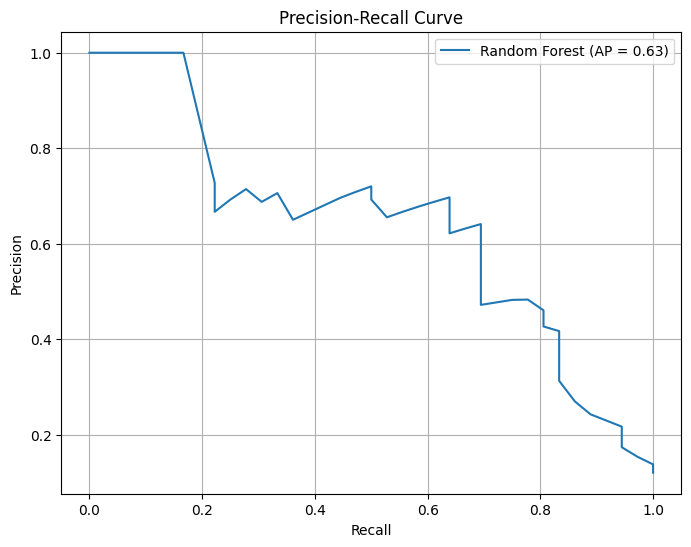

In [51]:
#43 Train a Random Forest Classifier and plot the Precision-Recall curve.

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, average_precision_score

x, y = make_classification(n_samples=1000, n_features= 20,n_classes=2 ,weights=[0.9, 0.1], random_state=1)

x_train,x_test , y_train,y_test  = train_test_split(x, y, test_size= 0.30, random_state=1)

rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(x_train, y_train)

# Get predicted probabilities for the positive class
y_scores = rf.predict_proba(x_test)[:, 1]

# Compute Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
avg_precision = average_precision_score(y_test, y_scores)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Random Forest (AP = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

In [52]:
#44 Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy.


import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Define individual models (base models)
logistic = LogisticRegression(max_iter=200)  # Increased max_iter for convergence
rf = RandomForestClassifier(random_state=1)

# Define the Stacking Classifier with Logistic Regression and Random Forest as base models
stacking = StackingClassifier(estimators=[('rf', rf), ('logistic', logistic)], final_estimator=LogisticRegression())

# Train the Stacking Classifier
stacking.fit(X_train, y_train)

# Make predictions
y_pred = stacking.predict(X_test)

# Calculate accuracy for the Stacking Classifier
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy of the Stacking Classifier
print(f"Stacking Classifier Accuracy: {accuracy:.4f}")

Stacking Classifier Accuracy: 0.9556


max_samples=0.1, MSE=7413.66
max_samples=0.3, MSE=5939.84
max_samples=0.5, MSE=5555.39
max_samples=0.7, MSE=5443.91
max_samples=1.0, MSE=5439.41


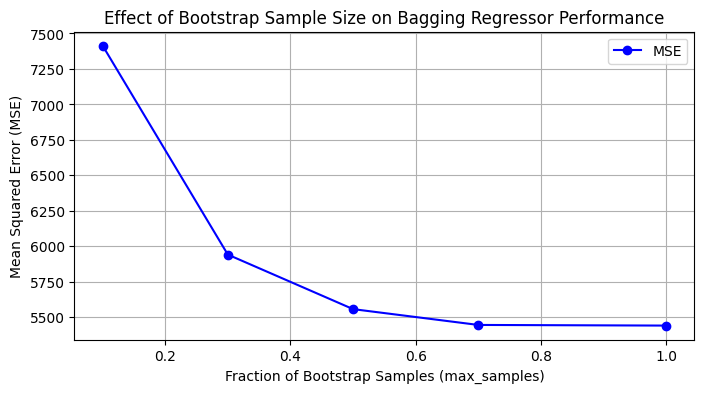

In [57]:
#45 Train a Bagging Regressor with different levels of bootstrap samples and compare performance.

import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Generate synthetic regression data
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# List to store performance metrics
mse_scores = []
max_samples_values = [0.1, 0.3, 0.5, 0.7, 1.0]  # Fraction of samples to bootstrap

for max_samples in max_samples_values:
    # Initialize Bagging Regressor (use estimator instead of base_estimator)
    bagging = BaggingRegressor(
        estimator=DecisionTreeRegressor(),
        n_estimators=50,
        max_samples=max_samples,
        random_state=1
    )

    # Train and predict
    bagging.fit(X_train, y_train)
    y_pred = bagging.predict(X_test)

    # Store MSE
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    print(f"max_samples={max_samples:.1f}, MSE={mse:.2f}")

# Plot MSE vs. max_samples
plt.figure(figsize=(8, 4))
plt.plot(max_samples_values, mse_scores, 'bo-', label='MSE')
plt.xlabel("Fraction of Bootstrap Samples (max_samples)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Effect of Bootstrap Sample Size on Bagging Regressor Performance")
plt.legend()
plt.grid(True)
plt.show()